In [3]:
import torch
import torchaudio
from datasets import load_dataset
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

In [4]:
model_name = "indonesian-nlp/wav2vec2-large-xlsr-indonesian"
#model_name = "ayameRushia/wav2vec2-large-xlsr-indonesia-demo"
#model_name = "Galuh/wav2vec2-large-xlsr-indonesian-demo"

processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name) 
# model.to("cuda")

Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [100]:
# Preprocessing the datasets.
# We need to read the aduio files as arrays
def speech_file_to_array_fn(batch):
    speech_array, sampling_rate = torchaudio.load(batch["path"])
    resampler = torchaudio.transforms.Resample(sampling_rate/1.0, 16_000)
    volume = torchaudio.transforms.Vol(1.0)
    batch["speech"] = resampler(volume(speech_array)).squeeze().numpy()
    return batch

In [13]:
test_dataset = load_dataset("common_voice", "id", split="test[:2%]")
test_dataset = test_dataset.map(speech_file_to_array_fn)
inputs = processor(test_dataset["speech"][:5], sampling_rate=16_000, return_tensors="pt", padding=True)

Couldn't find file locally at common_voice/common_voice.py, or remotely at https://raw.githubusercontent.com/huggingface/datasets/1.4.1/datasets/common_voice/common_voice.py.
The file was picked from the master branch on github instead at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/common_voice/common_voice.py.
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/id/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)
Loading cached processed dataset at /root/.cache/huggingface/datasets/common_voice/id/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-e1af9a99f71daf8f.arrow


In [17]:
inputs['input_values']

tensor([[ 0.0011,  0.0011,  0.0011,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0093, -0.0029, -0.0019],
        [-0.0014, -0.0014, -0.0014,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0013,  0.0013,  0.0013,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0007, -0.0007, -0.0007,  ...,  0.0000,  0.0000,  0.0000]])

In [5]:
with torch.no_grad():
    logits = model(inputs.input_values, attention_mask=inputs.attention_mask).logits

predicted_ids = torch.argmax(logits, dim=-1)

In [6]:
print("Prediction:", processor.batch_decode(predicted_ids))
print("Reference:", test_dataset["sentence"][:5])

Prediction: ['minggu depan kakak perempuan saya menikah', 'berbagai bahasa daerah dan bahasa asing menjadu bahasa serapaan klim dan kemudian menjadi bahasa indonesia', 'apa yang bisa saya berikan kepadamu', 'inilah dunia kecil', 'nol']
Reference: ['Minggu depan kakak perempuan saya menikah.', 'Berbagai bahasa daerah dan bahasa asing menjadi bahasa serapan dan kemudian menjadi bahasa Indonesia.', 'apa yang bisa saya berikan kepadamu?', 'Inilah dunia kecil.', 'nol']


In [55]:
test_dataset = load_dataset("common_voice", "id", split="test")

Couldn't find file locally at common_voice/common_voice.py, or remotely at https://raw.githubusercontent.com/huggingface/datasets/1.4.1/datasets/common_voice/common_voice.py.
The file was picked from the master branch on github instead at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/common_voice/common_voice.py.
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/id/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)


In [56]:
test_dataset[0]["path"]

'/root/.cache/huggingface/datasets/downloads/extracted/fd8a16a97efd77adba3c26c54d0cfae6c9d9494c1017f8070f3f79db72c4b57c/cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_22888800.mp3'

In [64]:
import matplotlib.pyplot as plt

In [61]:
def show_wave(filename):
    index = songs[filename]
    print(test_dataset[index]["path"], "\n", test_dataset[index]["sentence"], )

/root/.cache/huggingface/datasets/downloads/extracted/fd8a16a97efd77adba3c26c54d0cfae6c9d9494c1017f8070f3f79db72c4b57c/cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_19773609.mp3 
 Saya pikir itu ide yang bagus.


In [77]:
# We need to read the aduio files as arrays
def show_wave(filename, gain=1.0):
    index = songs[filename]
    speech_array, sampling_rate = torchaudio.load(test_dataset[index]["path"])
    resampler = torchaudio.transforms.Resample(sampling_rate, 16_000)
    volume = torchaudio.transforms.Vol(gain)
    audio = resampler(volume(speech_array)).squeeze().numpy()
    plt.figure()
    plt.ylim([-1.0,1.0])
    plt.plot(audio)

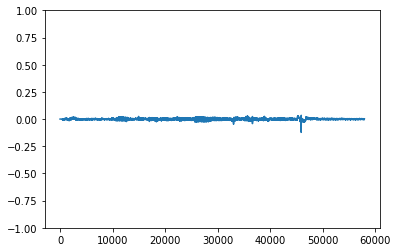

In [78]:
show_wave("common_voice_id_19773609.mp3", 1.0)

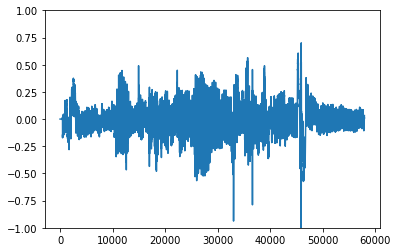

In [79]:
show_wave("common_voice_id_19773609.mp3", 20.0)

In [6]:
from pathlib import Path

In [7]:
test_dataset = load_dataset("common_voice", "id", split='test')
songs = {Path(row['path']).name: i for i, row in enumerate(test_dataset)}

Couldn't find file locally at common_voice/common_voice.py, or remotely at https://raw.githubusercontent.com/huggingface/datasets/1.4.1/datasets/common_voice/common_voice.py.
The file was picked from the master branch on github instead at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/common_voice/common_voice.py.
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/id/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)


In [8]:
songs['common_voice_id_24041300.mp3']

5

In [82]:
def transcript(filename):
    index = songs[filename]
    test_dataset = load_dataset("common_voice", "id", split=f'test[{index}:{index+1}]')
    test_dataset = test_dataset.map(speech_file_to_array_fn)
    inputs = processor(test_dataset["speech"][:5], sampling_rate=16_000, return_tensors="pt", padding=True)
    
    with torch.no_grad():
        logits = model(inputs.input_values, attention_mask=inputs.attention_mask).logits

    predicted_ids = torch.argmax(logits, dim=-1)
    print("Prediction:", processor.batch_decode(predicted_ids))
    print("Reference:", test_dataset["sentence"][0])

In [92]:
transcript("common_voice_id_19685341.mp3")

Couldn't find file locally at common_voice/common_voice.py, or remotely at https://raw.githubusercontent.com/huggingface/datasets/1.4.1/datasets/common_voice/common_voice.py.
The file was picked from the master branch on github instead at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/common_voice/common_voice.py.
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/id/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)



Prediction: ['sit menahkanka']
Reference: Saya pemimpin regu.


In [101]:
transcript("common_voice_id_20406088.mp3")

Couldn't find file locally at common_voice/common_voice.py, or remotely at https://raw.githubusercontent.com/huggingface/datasets/1.4.1/datasets/common_voice/common_voice.py.
The file was picked from the master branch on github instead at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/common_voice/common_voice.py.
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/id/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)



Prediction: ['penemuan ini akan tercata tam sujar']
Reference: Penemuan ini akan tercatat dalam sejarah.


In [18]:
test_dataset = load_dataset("common_voice", "id", split="test[:2%]")

Couldn't find file locally at common_voice/common_voice.py, or remotely at https://raw.githubusercontent.com/huggingface/datasets/1.4.1/datasets/common_voice/common_voice.py.
The file was picked from the master branch on github instead at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/common_voice/common_voice.py.
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/id/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)


In [21]:
test_dataset[5]

{'accent': '',
 'age': '',
 'client_id': '4a502bde4cffafbdf5f8b332a6bf9edc33b1421f51d066cf4218d5da72f69ffca7fdf51482c2143a27ee0b19dd65e3a95c31df41848df9dca4af00caf881189e',
 'down_votes': 0,
 'gender': '',
 'locale': 'id',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/fd8a16a97efd77adba3c26c54d0cfae6c9d9494c1017f8070f3f79db72c4b57c/cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_24041300.mp3',
 'segment': "''",
 'sentence': 'Coba lakukan dengan cara berbeda.',
 'up_votes': 2}

In [68]:
test_dataset = load_dataset("common_voice", "id", split="test[5:6]")

Couldn't find file locally at common_voice/common_voice.py, or remotely at https://raw.githubusercontent.com/huggingface/datasets/1.4.1/datasets/common_voice/common_voice.py.
The file was picked from the master branch on github instead at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/common_voice/common_voice.py.
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/id/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)


In [28]:
test_dataset[0]

{'accent': '',
 'age': '',
 'client_id': '4a502bde4cffafbdf5f8b332a6bf9edc33b1421f51d066cf4218d5da72f69ffca7fdf51482c2143a27ee0b19dd65e3a95c31df41848df9dca4af00caf881189e',
 'down_votes': 0,
 'gender': '',
 'locale': 'id',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/fd8a16a97efd77adba3c26c54d0cfae6c9d9494c1017f8070f3f79db72c4b57c/cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_24041300.mp3',
 'segment': "''",
 'sentence': 'Coba lakukan dengan cara berbeda.',
 'up_votes': 2}